In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio

In [115]:
base = 'C:/Users/yuhan/nanospheres/Data/Charging/Lock in/240321/Comparison ('
files = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
end = ').mat'

In [116]:
z = []
HV = []
drive = []
R = []
phase = []
for i in files:
    filename = base+i+end
    data = sio.loadmat(filename)
    z_tmp = np.transpose(data['C'])[0]
    HV_tmp = np.transpose(data['E'])[0]
    drive_tmp = np.transpose(data['G'])[0]
    R_tmp = np.transpose(data['D'])[0]
    phase_tmp = np.transpose(data['H'])[0]
    z = np.concatenate((z,z_tmp))
    HV = np.concatenate((HV, HV_tmp))
    drive = np.concatenate((drive, drive_tmp))
    R = np.concatenate((R,R_tmp))
    phase = np.concatenate((phase,phase_tmp))
z = np.array(z)
HV = np.array(HV)
drive = np.array(drive)
R = np.array(R)
phase = np.array(phase)

time = np.linspace(0, len(z)*5*10**(-6), len(z))


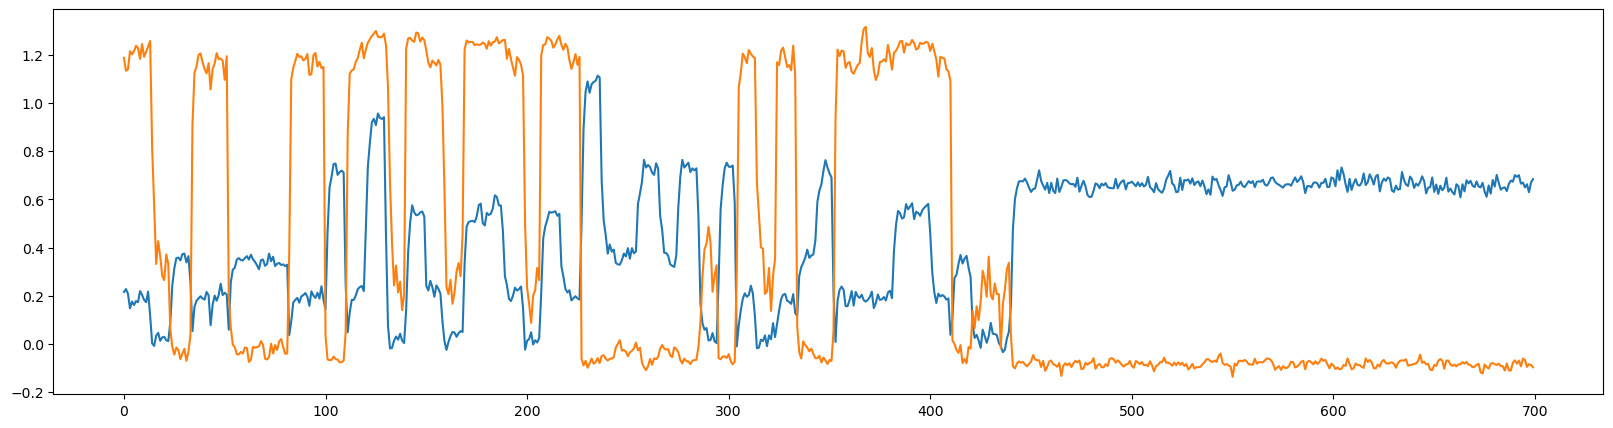

In [125]:
plt.figure(figsize = (20, 5))
plt.plot(time[::2*10**5], R[::2*10**5]-0.1)
plt.plot(time[::2*10**5], phase[::2*10**5]/2/np.pi+1)
#plt.plot(time, np.cos(phase/2)*1.3+0.3)
#plt.figure()
#plt.plot(time, R*(np.cos(phase/2)*1.3+0.3))

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

import scipy
from scipy.signal import butter, lfilter

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='highpass')
    return b, a

def butter_highpass_filter(data, highcut, fs, order=5):
    b, a = butter_highpass(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def charge_from_tt(signal, drive, centre_freq):
    filt = butter_lowpass_filter(signal, centre_freq+10, fs = 10**6, order=5)
    filtfilt = butter_highpass_filter(filt, centre_freq-10, fs = 10**6, order=5)
    mod = filtfilt*drive
    mod_filt = butter_lowpass_filter(mod, 1, fs = 10**6, order=2)
    return mod_filt

def charge_from_tt2(signal, drive, centre_freq):
    filt = butter_lowpass_filter(signal, centre_freq+10, fs = 2*10**5, order=3)
    filtfilt = butter_highpass_filter(filt, centre_freq-10, fs = 2*10**5, order=3)
    fftsig = scipy.fft.rfft(filtfilt)
    fftdrive = scipy.fft.rfft(drive)
    corr = fftsig*np.conjugate(fftdrive)
    charge = max(corr, key = abs)
    return charge

def charge_from_PSD(signal, cf):
    PSDz = scisig.welch(signal, fs = 200000, nperseg = 20000)
    return np.max(PSDz[1][int(cf/10)-10:int(cf/10)+10])

In [61]:
charge_from_PSD(z[0:200000], 70000)

1.0700142284200321e-08

In [127]:
PSDz = scisig.welch(z[43*200000:47*200000], fs = 200000, nperseg = 20000)

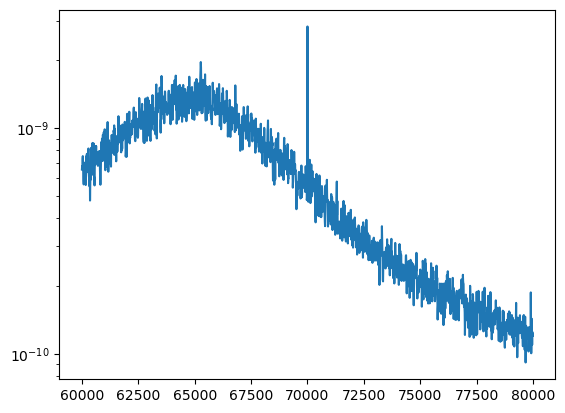

In [128]:
lb = int(70000/10)-1000
ub = int(70000/10)+1000
plt.plot(PSDz[0][lb:ub], PSDz[1][lb:ub])
plt.yscale('log')

In [190]:
charge_l = []
for i in range(0, 1400, 1):
    charge = charge_from_tt2(z[i*100000:(i+1)*100000], drive[i*100000:(i+1)*100000], 70000)
    charge_l.append(charge)

#charge_l2 = []
#for i in range(0, 1400, 1):
#    charge = charge_from_PSD(z[i*100000:(i+1)*100000], 70000)
#    charge_l2.append(charge)

In [172]:
mask = []
for i in phase[::100000]:
    if i > 0:
        mask.append(-1)
    else:
        mask.append(1)

mask = np.array(mask)

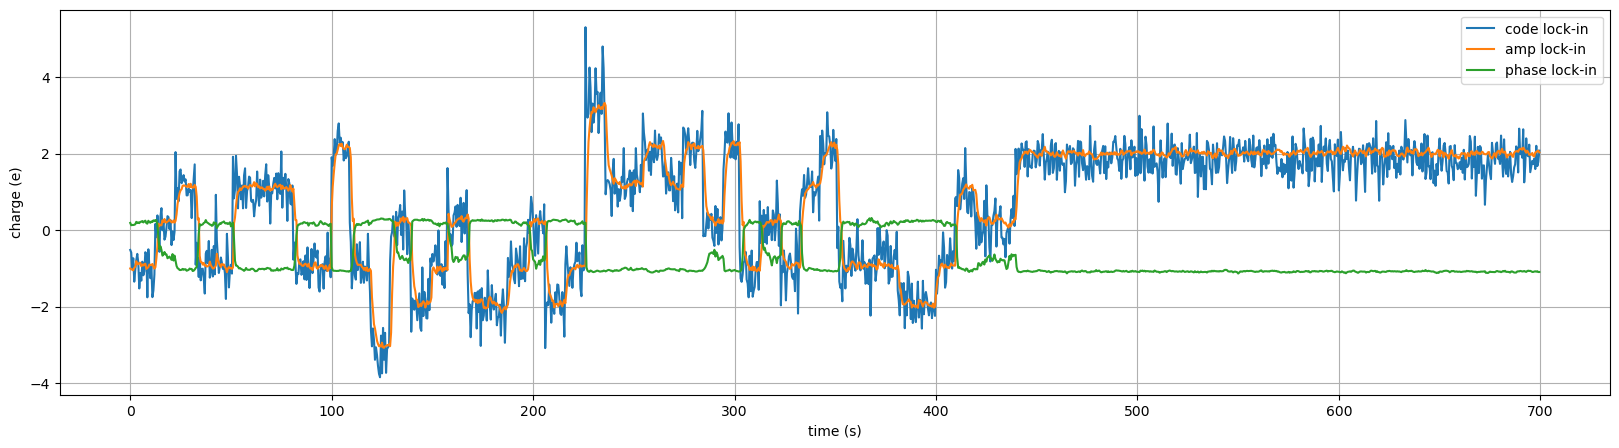

In [191]:
plt.figure(figsize = (20, 5))
plt.plot(time[::100000], np.array(charge_l)/10**6*6, label = 'code lock-in')
#plt.plot(time[::100000], np.sqrt(np.array(charge_l2))*10**4*3.5-1, label = 'from PSD')
plt.plot(time[::100000], mask*R[::100000]*2.8-0.12, label = 'amp lock-in')
plt.plot(time[::100000], phase[::100000]/2/np.pi, label = 'phase lock-in')
plt.grid()
plt.ylabel('charge (e)')
plt.xlabel('time (s)')
plt.legend()

In [194]:
foo = sio.loadmat('C:/Users/yuhan/nanospheres/Data/Monitoring/240321/tt.mat')

In [201]:
390626/20*3600/1000000*9

632.81412

In [208]:
60/((220+33)/60)*4*10

569.1699604743083

In [205]:
)

SyntaxError: unmatched ')' (687023194.py, line 1)